<a href="https://colab.research.google.com/github/dharun-narayanan/Forex_Predictive_Model/blob/main/ForexPredictiveModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color='gree' size=10.0>**Abstract**</font> <br/>
Forex (foreign exchange) is a special financial market that entails both high risks and high profit opportunities for traders. It is also a very simple market since traders can profit by just predicting the direction of the exchange rate between two currencies. However, incorrect predictions in Forex may cause much higher losses than in other typical financial markets. The direction prediction requirement makes the problem quite different from other typical time-series forecasting problems.

The main decision in Forex involves forecasting the directional movement between two currencies. Traders can profit from transactions with correct directional prediction and lose with incorrect prediction. Therefore, identifying directional movement is the problem addressed in this study.

We chose the Pound Sterling/US dollar <font color='red'>(GBP/USD)</font> pair for the analysis, since it is one among the largest traded Forex currency pair in the world.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [3]:
# Get Dataset from drive
#Connecting to the Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Give Dataset path in Google drive
# Loading the dataset from the drive

df_1 = pd.read_csv('drive/My Drive/FODS_Project/GBPUSD1.csv')
df_5 = pd.read_csv('drive/My Drive/FODS_Project/GBPUSD5.csv')
df_15 = pd.read_csv('drive/My Drive/FODS_Project/GBPUSD15.csv')
df_30 = pd.read_csv('drive/My Drive/FODS_Project/GBPUSD30.csv')
df_60 = pd.read_csv('drive/My Drive/FODS_Project/GBPUSD60.csv')
df_4h = pd.read_csv('drive/My Drive/FODS_Project/GBPUSD240.csv')
df_1d = pd.read_csv('drive/My Drive/FODS_Project/GBPUSD1440.csv')

<font color='#15d1e6' size=8.0>**Description / INFO**</font> <br/>
<font color='white' size=6.0>**Pre-Processing**</font>

In [5]:
print('One Minute Chart Shape : ',df_1.shape)
print('Five Minute Chart Shape : ',df_5.shape)
print('Fifteen Minute Chart Shape : ',df_15.shape)
print('Thirty Minute Chart Shape : ',df_30.shape)
print('One Hour Chart Shape : ',df_60.shape)
print('Four Hour Chart Shape : ',df_4h.shape)
print('One Day Chart Shape : ',df_1d.shape)

One Minute Chart Shape :  (14926, 7)
Five Minute Chart Shape :  (2047, 7)
Fifteen Minute Chart Shape :  (2047, 7)
Thirty Minute Chart Shape :  (2542, 7)
One Hour Chart Shape :  (2900, 7)
Four Hour Chart Shape :  (12623, 7)
One Day Chart Shape :  (1171, 7)


In [ ]:
df_1.head()

,2021.08.25,20:28,1.37373,1.37375,1.37373.1,1.37373.2,29
0,2021.08.25,20:29,1.37374,1.37394,1.37373,1.37393,122
1,2021.08.25,20:30,1.37394,1.37397,1.37390,1.37390,168
2,2021.08.25,20:31,1.37391,1.37393,1.37387,1.37390,157
3,2021.08.25,20:32,1.37389,1.37397,1.37387,1.37393,114
4,2021.08.25,20:33,1.37394,1.37397,1.37392,1.37395,70


In [ ]:
df_5.head()

,2021.09.01,21:20,1.37787,1.37796,1.37780,1.37785,290
0,2021.09.01,21:25,1.37785,1.37798,1.37785,1.37795,285
1,2021.09.01,21:30,1.37795,1.37796,1.37768,1.37783,408
2,2021.09.01,21:35,1.37784,1.37785,1.37757,1.37757,468
3,2021.09.01,21:40,1.37757,1.37770,1.37754,1.37768,269
4,2021.09.01,21:45,1.37766,1.37779,1.37766,1.37775,279


In [ ]:
df_15.head()

,2021.08.12,16:00,1.38463,1.38468,1.38333,1.38343,2928
0,2021.08.12,16:15,1.38343,1.38440,1.38341,1.38431,1911
1,2021.08.12,16:30,1.38433,1.38445,1.38362,1.38374,2792
2,2021.08.12,16:45,1.38374,1.38396,1.38314,1.38380,2090
3,2021.08.12,17:00,1.38380,1.38382,1.38336,1.38361,2213
4,2021.08.12,17:15,1.38361,1.38362,1.38295,1.38298,1303


In [6]:
df_1.columns = ['Date','Time','Open','High','Low','Close','Volume']
df_5.columns = ['Date','Time','Open','High','Low','Close','Volume']
df_15.columns = ['Date','Time','Open','High','Low','Close','Volume']
df_30.columns = ['Date','Time','Open','High','Low','Close','Volume']
df_60.columns = ['Date','Time','Open','High','Low','Close','Volume']
df_4h.columns = ['Date','Time','Open','High','Low','Close','Volume']
df_1d.columns = ['Date','Time','Open','High','Low','Close','Volume']

In [ ]:
print(df_1.head(3))
print()
print(df_15.head(3))
print()
print(df_4h.head(3))

         Date   Time     Open     High      Low    Close  Volume  pip
0  2021.08.25  20:29  1.37374  1.37394  1.37373  1.37393     122   -2
1  2021.08.25  20:30  1.37394  1.37397  1.37390  1.37390     168    0
2  2021.08.25  20:31  1.37391  1.37393  1.37387  1.37390     157    0

         Date   Time     Open     High      Low    Close  Volume  pip
0  2021.08.12  16:15  1.38343  1.38440  1.38341  1.38431    1911   -9
1  2021.08.12  16:30  1.38433  1.38445  1.38362  1.38374    2792    5
2  2021.08.12  16:45  1.38374  1.38396  1.38314  1.38380    2090   -1

         Date   Time    Open    High     Low   Close  Volume  pip
0  2009.12.21  04:00  1.6159  1.6161  1.6117  1.6130    6251   28
1  2009.12.21  08:00  1.6129  1.6156  1.6088  1.6125   11887    4
2  2009.12.21  12:00  1.6124  1.6132  1.6075  1.6085   12436   39


In [ ]:
df_1.describe()

,Open,High,Low,Close,Volume
count,14926.000000,14926.00000,14926.000000,14926.000000,14926.000000
mean,1.379269,1.37934,1.379198,1.379269,103.360847
std,0.004889,0.00489,0.004889,0.004889,103.606178
min,1.368000,1.36806,1.367930,1.368010,1.000000
25%,1.375810,1.37588,1.375730,1.375810,35.000000
50%,1.378420,1.37850,1.378350,1.378420,75.000000
75%,1.383620,1.38367,1.383570,1.383620,139.000000
max,1.389070,1.38912,1.389060,1.389080,2960.000000


In [ ]:
df_5.describe()

,Open,High,Low,Close,Volume
count,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000
mean,1.381666,1.381841,1.381494,1.381668,518.878847
std,0.003578,0.003582,0.003579,0.003578,463.293459
min,1.373010,1.373600,1.372590,1.373010,5.000000
25%,1.377990,1.378125,1.377845,1.377980,212.500000
50%,1.383140,1.383280,1.382970,1.383130,389.000000
75%,1.384350,1.384525,1.384180,1.384350,682.500000
max,1.389060,1.389120,1.388850,1.389060,6427.000000


In [ ]:
df_15.describe()

,Open,High,Low,Close,Volume
count,2047.000000,2047.000000,2047.000000,2047.000000,2047.000000
mean,1.376864,1.377188,1.376532,1.376865,1371.432829
std,0.006452,0.006436,0.006464,0.006452,1174.983285
min,1.360460,1.361180,1.360160,1.360470,24.000000
25%,1.372850,1.373150,1.372580,1.372840,603.500000
50%,1.376640,1.376930,1.376250,1.376640,1070.000000
75%,1.383025,1.383295,1.382670,1.383025,1790.500000
max,1.388950,1.389120,1.388820,1.388960,18414.000000


In [ ]:
df_30.describe()

,Open,High,Low,Close,Volume
count,2542.000000,2542.000000,2542.000000,2542.000000,2542.000000
mean,1.380477,1.380995,1.379949,1.380482,3480.107396
std,0.007807,0.007791,0.007828,0.007808,2877.463770
min,1.357960,1.359340,1.357110,1.357970,62.000000
25%,1.375610,1.376050,1.375132,1.375612,1480.000000
50%,1.381435,1.382000,1.380990,1.381435,2670.500000
75%,1.385947,1.386485,1.385398,1.385947,4685.750000
max,1.398240,1.398280,1.397210,1.398250,31236.000000


In [ ]:
df_60.describe()

,Open,High,Low,Close,Volume
count,2900.000000,2900.000000,2900.000000,2900.000000,2900.000000
mean,1.389876,1.390679,1.389074,1.389889,7333.542414
std,0.015039,0.015040,0.015042,0.015035,5420.437655
min,1.359290,1.361440,1.357110,1.359300,45.000000
25%,1.378378,1.379360,1.377575,1.378390,3329.750000
50%,1.386640,1.387415,1.385750,1.386660,5992.500000
75%,1.397000,1.397982,1.396112,1.396993,10229.000000
max,1.424070,1.425010,1.423310,1.424060,67085.000000


In [ ]:
df_4h.describe()

,Open,High,Low,Close,Volume
count,12623.000000,12623.000000,12623.000000,12623.000000,12623.000000
mean,1.434931,1.437157,1.432726,1.434948,16861.424146
std,0.137394,0.137523,0.137238,0.137383,11600.668578
min,1.146520,1.153650,1.140980,1.146530,41.000000
25%,1.304725,1.306630,1.302915,1.304725,8247.000000
50%,1.400880,1.403020,1.399120,1.400750,13970.000000
75%,1.569595,1.571945,1.567435,1.569615,22318.500000
max,1.671320,1.674490,1.669200,1.671320,106179.000000


In [ ]:
df_1d.describe()

,Open,High,Low,Close,Volume
count,1171.000000,1171.000000,1171.000000,1171.000000,1171.000000
mean,1.311465,1.317293,1.306554,1.311949,195491.249360
std,0.053072,0.052699,0.053326,0.053050,71378.909763
min,1.148650,1.171410,1.140930,1.147840,68967.000000
25%,1.278100,1.284220,1.272930,1.278700,144003.500000
50%,1.305150,1.311310,1.300540,1.305190,184583.000000
75%,1.347255,1.354870,1.342925,1.349140,231349.000000
max,1.433580,1.437620,1.428190,1.433780,635424.000000


In [7]:
df_1d.drop('Time', axis = 1,inplace=True)
df_1d.head()

,Date,Open,High,Low,Close,Volume
0,2017.03.07,1.22323,1.22521,1.21685,1.21951,169063
1,2017.03.08,1.21908,1.22132,1.21381,1.21643,169912
2,2017.03.09,1.21643,1.21948,1.21338,1.21642,199114
3,2017.03.10,1.21642,1.21878,1.21378,1.21658,188516
4,2017.03.13,1.21572,1.22503,1.21512,1.22153,212231


In [8]:
def pip(df):
  df['pip'] = 0
  for index, row in df.iterrows():
    pip_value = math.floor(row['Open']*10000 - row['Close']*10000)
    df.at[index,'pip'] = pip_value

In [9]:
pip(df_1)
pip(df_5)
pip(df_15)
pip(df_30)
pip(df_60)
pip(df_4h)
pip(df_1d)

In [10]:
print(df_5.head(3))
print()
print(df_30.head(3))
print()
print(df_4h.head(3))

         Date   Time     Open     High      Low    Close  Volume  pip
0  2021.09.01  21:25  1.37785  1.37798  1.37785  1.37795     285   -1
1  2021.09.01  21:30  1.37795  1.37796  1.37768  1.37783     408    1
2  2021.09.01  21:35  1.37784  1.37785  1.37757  1.37757     468    2

         Date   Time     Open     High      Low    Close  Volume  pip
0  2021.06.30  01:00  1.38380  1.38437  1.38378  1.38437    1549   -6
1  2021.06.30  01:30  1.38437  1.38437  1.38397  1.38426     600    1
2  2021.06.30  02:00  1.38425  1.38432  1.38377  1.38398    1302    2

         Date   Time    Open    High     Low   Close  Volume  pip
0  2009.12.21  04:00  1.6159  1.6161  1.6117  1.6130    6251   28
1  2009.12.21  08:00  1.6129  1.6156  1.6088  1.6125   11887    4
2  2009.12.21  12:00  1.6124  1.6132  1.6075  1.6085   12436   39


In [11]:
df_1.isna().sum()

Date      0
Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
pip       0
dtype: int64

In [12]:
df_60.isna().sum()

Date      0
Time      0
Open      0
High      0
Low       0
Close     0
Volume    0
pip       0
dtype: int64

In [13]:
df_1d.isna().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
pip       0
dtype: int64

<font color='#15d1e6' size=8.0>**Exploratory Data Analysis**</font> <br/>
<font color='white' size=6.0>**Visualization**</font>

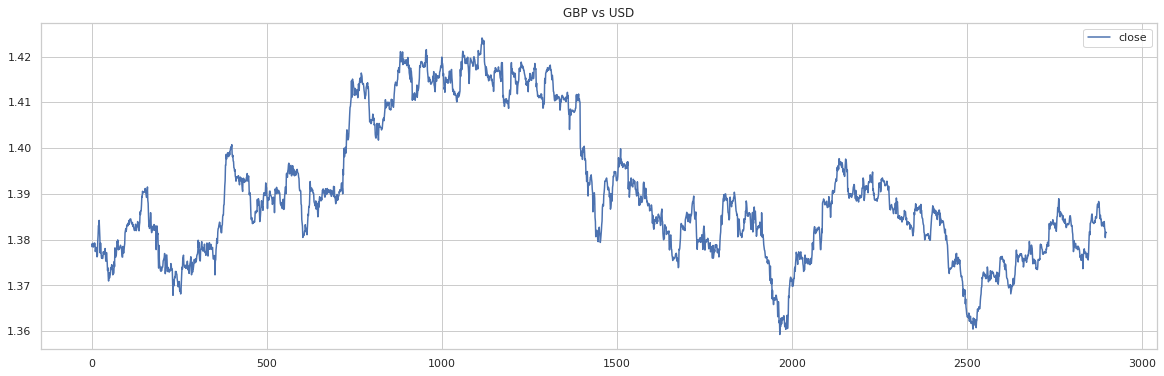

In [27]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,6))
plt.plot(df_60.Close,label='close')
plt.title('GBP vs USD')
plt.legend()
plt.show()

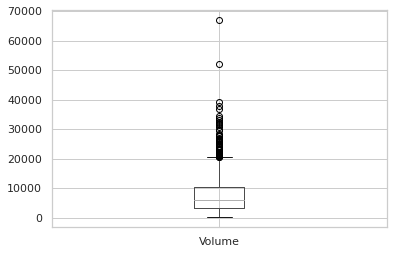

In [55]:
df_60[['Volume']].boxplot()

In [ ]:
vol_mean = df_4h.groupby('Time')['Volume'].mean()

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


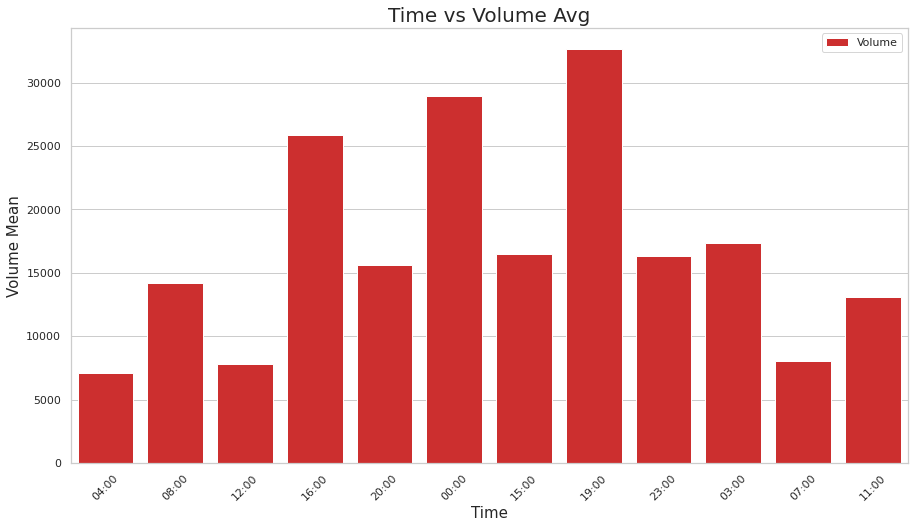

In [ ]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8))
sns.barplot(df_4h['Time'].unique(),vol_mean,label='Volume',color='#e61515')
plt.xlabel('Time',fontsize=15)
plt.ylabel('Volume Mean',fontsize=15)
plt.title('Time vs Volume Avg',fontsize=20)
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [65]:
rslt_df = df_4h[df_4h['Date'].str.contains('2021.08.02')]
rslt_df

,Date,Time,Open,High,Low,Close,Volume,pip
12443,2021.08.02,00:00,1.38941,1.39040,1.38856,1.38999,11209,-6
12444,2021.08.02,04:00,1.38999,1.39031,1.38859,1.38985,15370,1
12445,2021.08.02,08:00,1.38984,1.39320,1.38956,1.39206,26301,-23
12446,2021.08.02,12:00,1.39205,1.39241,1.38837,1.38895,26670,31
12447,2021.08.02,16:00,1.38896,1.39180,1.38752,1.38948,47576,-6
12448,2021.08.02,20:00,1.38948,1.38950,1.38785,1.38860,14022,8


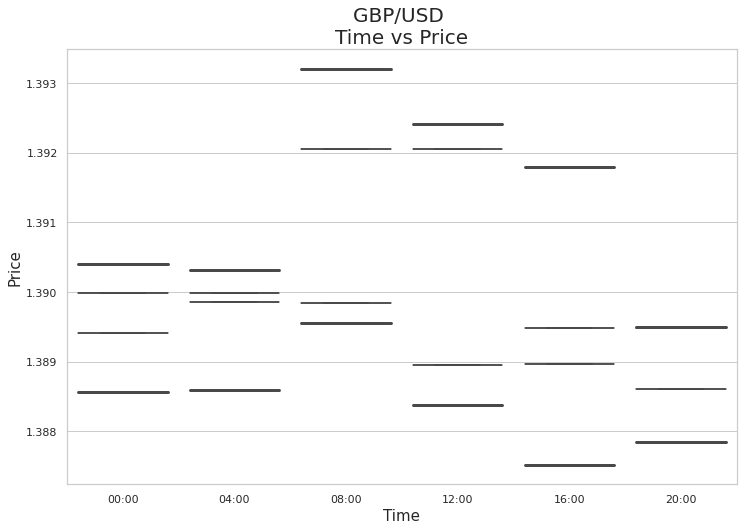

In [66]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8))
sns.boxplot(x="Time",y="High",data=rslt_df,linewidth=3.0)
sns.boxplot(x="Time",y="Low",data=rslt_df,linewidth=3.0)
sns.boxplot(x="Time",y="Open",data=rslt_df)
sns.boxplot(x="Time",y="Close",data=rslt_df)
plt.xlabel('Time',fontsize=15.0)
plt.ylabel('Price',fontsize=15.0)
plt.title('GBP/USD \nTime vs Price',fontsize=20.0)
plt.show()

In [56]:
rslt_df1 = df_4h[df_4h['Date'].str.contains('2021')]
rslt_df1

,Date,Time,Open,High,Low,Close,Volume,pip
11542,2021.01.03,23:00,1.36506,1.36897,1.36405,1.36825,19113,-32
11543,2021.01.04,03:00,1.36825,1.36985,1.36679,1.36837,17377,-2
11544,2021.01.04,07:00,1.36833,1.37031,1.36647,1.36731,24880,10
11545,2021.01.04,11:00,1.36730,1.37040,1.36144,1.36268,28205,46
11546,2021.01.04,15:00,1.36265,1.36320,1.35418,1.35665,36327,60
...,...,...,...,...,...,...,...,...
12618,2021.09.10,04:00,1.38411,1.38512,1.38324,1.38485,15554,-8
12619,2021.09.10,08:00,1.38482,1.38846,1.38394,1.38777,31473,-30
12620,2021.09.10,12:00,1.38777,1.38879,1.38631,1.38789,29098,-2
12621,2021.09.10,16:00,1.38788,1.38796,1.38409,1.38533,41934,25


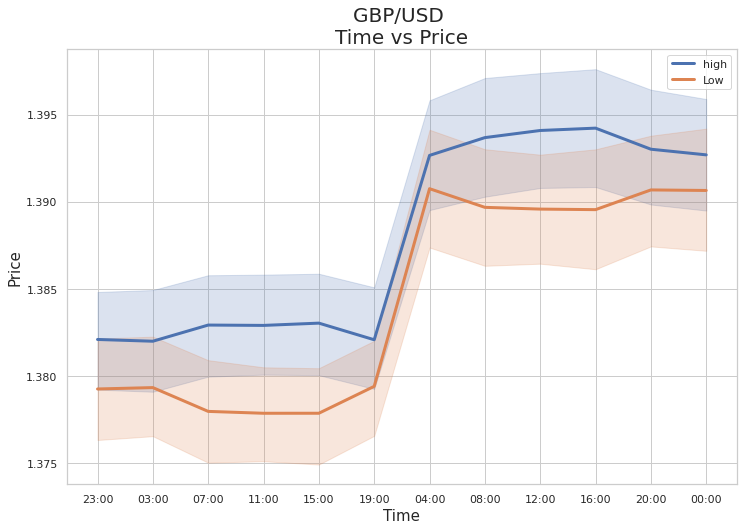

In [61]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(12,8))
sns.lineplot(x="Time",y="High",data=rslt_df1,linewidth=3.0,label='high')
sns.lineplot(x="Time",y="Low",data=rslt_df1,linewidth=3.0,label='Low')
plt.xlabel('Time',fontsize=15.0)
plt.ylabel('Price',fontsize=15.0)
plt.title('GBP/USD \nTime vs Price',fontsize=20.0)
plt.legend()
plt.show()

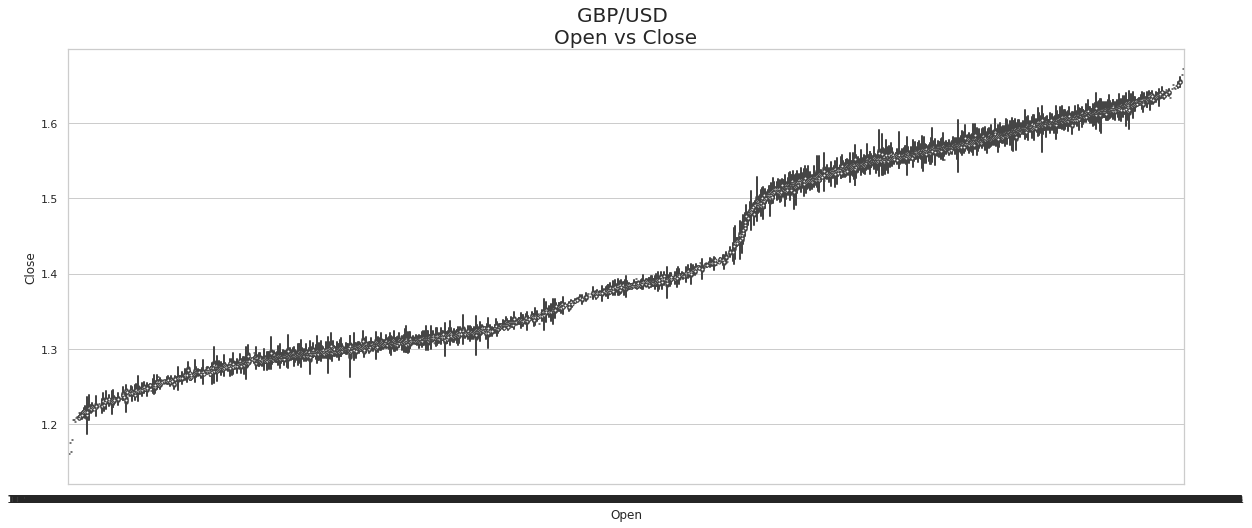

In [53]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(20,8))
sns.violinplot(x="Open",y="Close",data=df_4h)
plt.title('GBP/USD \nOpen vs Close',fontsize=20.0)
plt.show()

<font color='#15d1e6' size=8.0>**Exploratory Data Analysis**</font> <br/>
<font color='white' size=6.0>**Statistics**</font>

In [44]:
at_high = round(df_1d['High'].max(),5)
at_low = round(df_1d['Low'].min(),5)
print('All Time Price High : ',at_high)
print('All Time Price Low : ',at_low)

All Time Price High :  1.43762
All Time Price Low :  1.14093


In [63]:
df_30['High'].mode()

0    1.37574
1    1.38376
dtype: float64

In [49]:
df_30.corr()

,Open,High,Low,Close,Volume,pip
Open,1.000000,0.997363,0.997567,0.995242,-0.055816,0.049324
High,0.997363,1.000000,0.996051,0.997784,-0.021641,-0.003728
Low,0.997567,0.996051,1.000000,0.997474,-0.090895,0.001611
Close,0.995242,0.997784,0.997474,1.000000,-0.054452,-0.048150
Volume,-0.055816,-0.021641,-0.090895,-0.054452,1.000000,-0.014378
pip,0.049324,-0.003728,0.001611,-0.048150,-0.014378,1.000000


In [46]:
df_30['Close'].value_counts().head(20)

1.38348    6
1.37575    5
1.37584    5
1.37154    5
1.37162    5
1.37684    5
1.37625    5
1.38871    5
1.37192    5
1.38359    5
1.38468    5
1.38800    5
1.37795    5
1.37143    5
1.38435    5
1.38168    5
1.37623    5
1.38460    5
1.37789    4
1.38293    4
Name: Close, dtype: int64

In [47]:
df_30['High'].value_counts().head(20)

1.37574    7
1.38376    7
1.37647    6
1.38512    6
1.37253    6
1.38699    6
1.37608    5
1.37578    5
1.37291    5
1.38477    5
1.38746    5
1.37668    5
1.38330    5
1.38523    5
1.38417    5
1.37606    5
1.37936    4
1.37937    4
1.38405    4
1.38400    4
Name: High, dtype: int64

In [48]:
df_30['Low'].value_counts().head(20)

1.38377    7
1.38178    6
1.38449    6
1.38202    6
1.38510    6
1.38557    5
1.37464    5
1.37600    5
1.38644    5
1.38507    5
1.38344    5
1.37519    5
1.37588    5
1.37543    5
1.38302    5
1.38352    5
1.38446    5
1.37663    5
1.37373    4
1.38360    4
Name: Low, dtype: int64

In [52]:
df_30.skew()

Open     -0.402114
High     -0.395079
Low      -0.413521
Close    -0.401465
Volume    2.152994
pip      -0.311930
dtype: float64

In [51]:
df_30.kurtosis()

Open     -0.155464
High     -0.166838
Low      -0.143299
Close    -0.155930
Volume    8.917183
pip       7.040654
dtype: float64